In [141]:
import pandas as pd

df = pd.read_csv("../data/card_transdata.csv")
df.drop_duplicates(inplace=True)

# Perform stratified sampling
fraud_ratio = df["fraud"].value_counts(normalize=True)
df_sample = df.groupby("fraud", group_keys=False).apply(lambda x: x.sample(frac=10000 / len(df), random_state=42))

# Check the fraud ratio in the sample
original_fraud_ratio = df["fraud"].mean()
sample_fraud_ratio = df_sample["fraud"].mean()

# Display the sampled DataFrame and fraud ratios
print(df_sample.head())
print(fraud_ratio.to_dict())
print(f"Original Fraud Ratio: {original_fraud_ratio:.4f}")
print(f"Sample Fraud Ratio: {sample_fraud_ratio:.4f}")
df = df_sample


        distance_from_home  distance_from_last_transaction  \
763547            8.073065                        0.614990   
23634            31.994433                        5.808574   
157152            8.015637                        4.319242   
238071            6.230256                        0.796154   
846711           44.997072                       10.943190   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
763547                        0.077806              1.0        0.0   
23634                         1.186485              1.0        0.0   
157152                        0.906554              1.0        0.0   
238071                        0.206875              1.0        1.0   
846711                        0.856966              1.0        0.0   

        used_pin_number  online_order  fraud  
763547              0.0           1.0    0.0  
23634               1.0           0.0    0.0  
157152              0.0           1.0    0.0  
238071            

C:\Users\wyman\AppData\Local\Temp\ipykernel_4916\2692509709.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = df.groupby("fraud", group_keys=False).apply(lambda x: x.sample(frac=10000 / len(df), random_state=42))


This block inspects the dataset for missing values and general information, such as data types and statistical summaries.

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# check for missing values
print("Missing values:\n", df.isnull().sum())

# visualize basic statistics
print("Dataset Info:\n")
df.info()
print("\nSummary Statistics:\n")
print(df.describe())


Missing values:
 distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64
Dataset Info:

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 763547 to 128321
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              10000 non-null  float64
 1   distance_from_last_transaction  10000 non-null  float64
 2   ratio_to_median_purchase_price  10000 non-null  float64
 3   repeat_retailer                 10000 non-null  float64
 4   used_chip                       10000 non-null  float64
 5   used_pin_number                 10000 non-null  float64
 6   online_order                    10000 non-null  float64
 7   frau

This block normalizes the numeric features using StandardScaler to ensure that the KMeans algorithm performs effectively. StandardScaler normalizes the data such that the Mean equals 0 and the Standard Deviation equals 1. The binary columns are left unchanged.

In [143]:
from sklearn.preprocessing import StandardScaler

# separate features and labels
X = df.drop(columns=['fraud'], axis=1)  # Use only features for clustering
y = df['fraud']  # Extract the fraud column as labels

# separate binary columns
binary_columns = [col for col in X.columns if set(X[col].unique()) <= {0, 1}]

# separate continuous columns
continuous_columns = [col for col in X.columns if col not in binary_columns]

# scale only the continuous columns
scaler = StandardScaler()
X_scaled_continuous = scaler.fit_transform(df[continuous_columns])

# combine binary and scaled continuous data
X_scaled = pd.concat(
    [pd.DataFrame(X_scaled_continuous, columns=continuous_columns), X[binary_columns].reset_index(drop=True)],
    axis=1
)

# check that the classification labels were split properly
print("\nValue Counts for Target Labels:")
print(y.value_counts())
print(f"Fraud ratio: {y.mean()}")

# check that the other features were properly scaled
X_scaled.head()


Value Counts for Target Labels:
fraud
0.0    9126
1.0     874
Name: count, dtype: int64
Fraud ratio: 0.0874


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,-0.300468,-0.171813,-0.620199,1.0,0.0,0.0,1.0
1,0.069724,0.029595,-0.233014,1.0,0.0,1.0,0.0
2,-0.301357,-0.028162,-0.330774,1.0,0.0,0.0,1.0
3,-0.328986,-0.164787,-0.575124,1.0,1.0,0.0,0.0
4,0.270945,0.228716,-0.348092,1.0,0.0,0.0,1.0


Apply PCA with various variance thresholds and cluster ranges to determine the optimal amount of clusters and components to remove based on redundant features. 

PCA Threshold: 0.7, Clusters: 2, Silhouette Score: 0.9756, Retained Components: 3, Removed Components: 4
PCA Threshold: 0.7, Clusters: 3, Silhouette Score: 0.8567, Retained Components: 3, Removed Components: 4
PCA Threshold: 0.7, Clusters: 4, Silhouette Score: 0.7933, Retained Components: 3, Removed Components: 4
PCA Threshold: 0.8, Clusters: 2, Silhouette Score: 0.9756, Retained Components: 3, Removed Components: 4
PCA Threshold: 0.8, Clusters: 3, Silhouette Score: 0.8567, Retained Components: 3, Removed Components: 4
PCA Threshold: 0.8, Clusters: 4, Silhouette Score: 0.7933, Retained Components: 3, Removed Components: 4
PCA Threshold: 0.9, Clusters: 2, Silhouette Score: 0.2366, Retained Components: 5, Removed Components: 2
PCA Threshold: 0.9, Clusters: 3, Silhouette Score: 0.2445, Retained Components: 5, Removed Components: 2
PCA Threshold: 0.9, Clusters: 4, Silhouette Score: 0.2632, Retained Components: 5, Removed Components: 2
PCA Threshold: 0.95, Clusters: 2, Silhouette Score: 0.2

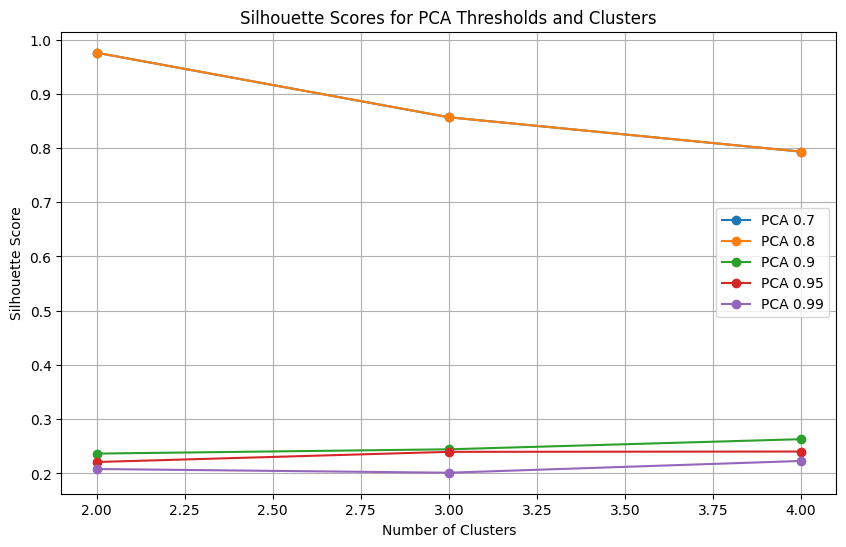

In [144]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Define PCA thresholds and cluster range
pca_thresholds = [0.70, 0.80, 0.90, 0.95, 0.99]
cluster_range = range(2, 5)

# Store results
optimal_results = []  # To store (pca_threshold, n_clusters, silhouette_score)

# Original number of components
original_components = X_scaled.shape[1]

for pca_threshold in pca_thresholds:
    # Apply PCA with the current threshold
    pca = PCA(n_components=pca_threshold)
    X_pca = pca.fit_transform(X_scaled)

    # Count retained and removed components
    retained_components = pca.n_components_
    removed_components = original_components - retained_components

    # Iterate over the range of clusters
    for n_clusters in cluster_range:
        # Train Gaussian Mixture Model
        gmm = GaussianMixture(n_components=n_clusters, n_init=50, covariance_type='tied', random_state=42)
        labels = gmm.fit_predict(X_pca)

        # Calculate the Silhouette Score
        silhouette_avg = silhouette_score(X_pca, labels)
        optimal_results.append((pca_threshold, n_clusters, silhouette_avg))
        # Print details
        print(
            f"PCA Threshold: {pca_threshold}, Clusters: {n_clusters}, "
            f"Silhouette Score: {silhouette_avg:.4f}, "
            f"Retained Components: {retained_components}, Removed Components: {removed_components}"
        )
# Find the best combination of PCA threshold and number of clusters
optimal_threshold, optimal_clusters, best_score = max(optimal_results, key=lambda x: x[2])
print(f"\nOptimal PCA Threshold: {optimal_threshold}, Optimal Clusters: {optimal_clusters}, Best Silhouette Score: {best_score:.4f}")

# Visualize Silhouette Scores
results_array = np.array(optimal_results)
plt.figure(figsize=(10, 6))
for threshold in pca_thresholds:
    scores = results_array[results_array[:, 0] == threshold][:, 2].astype(float)
    plt.plot(cluster_range, scores, marker='o', label=f'PCA {threshold}')

plt.title("Silhouette Scores for PCA Thresholds and Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid()
plt.show()


In [148]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Apply PCA with the optimal threshold
pca = PCA(n_components=optimal_threshold)
X_pca = pca.fit_transform(X_scaled)

y = np.array(y)

# Define Stratified K-Fold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define arrays to store confusion matrices
conf_matrices_smote = []
conf_matrices_no_smote = []

# ---- Cross-Validation with SMOTE ---- #
print("\nCross-Validation WITH SMOTE:")
fold_results_smote = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_pca, y)):
    print(f"Fold {fold + 1}/{n_splits}")
    
    # Split the data
    X_train, X_val = X_pca[train_idx], X_pca[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Print data size before SMOTE
    print(f"Before SMOTE: X_train size = {X_train.shape[0]}, y_train size = {y_train.shape[0]}")

    # Apply SMOTE to the training data only
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Print data size after SMOTE
    print(f"After SMOTE: X_train_smote size = {X_train_smote.shape[0]}, y_train_smote size = {y_train_smote.shape[0]}")

    # Train GMM with optimal clusters
    gmm = GaussianMixture(n_components=optimal_clusters, n_init=50, covariance_type='tied', random_state=42)
    gmm.fit(X_train_smote)
    
    # Predict clusters for the validation set
    val_clusters = gmm.predict(X_val)
    
    # Map clusters to labels dynamically
    results_df = pd.DataFrame({'Cluster': val_clusters, 'Actual': y_val})
    cluster_label_mapping = pd.crosstab(results_df['Cluster'], results_df['Actual'])


    cluster_to_label = {}
    for cluster in cluster_label_mapping.index:
        fraud_ratio = cluster_label_mapping.loc[cluster, 1.0] / cluster_label_mapping.loc[cluster].sum()
        cluster_to_label[cluster] = 1.0 if fraud_ratio > original_fraud_ratio else 0.0
    
    # Map clusters to labels
    mapped_val_clusters = [cluster_to_label[cluster] for cluster in val_clusters]
    cm = confusion_matrix(y_val, mapped_val_clusters)
    conf_matrices_smote.append(cm)

    # Evaluate metrics
    accuracy = accuracy_score(y_val, mapped_val_clusters)
    precision = precision_score(y_val, mapped_val_clusters, pos_label=1, zero_division=0)
    recall = recall_score(y_val, mapped_val_clusters, pos_label=1, zero_division=0)
    f1 = f1_score(y_val, mapped_val_clusters, pos_label=1, zero_division=0)
    
    # Store results
    fold_results_smote.append((accuracy, precision, recall, f1))
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    print("-" * 40)

# Average metrics across all folds for SMOTE
avg_metrics_smote = np.mean(fold_results_smote, axis=0)
print(f"Average Metrics Across Folds WITH SMOTE: Accuracy: {avg_metrics_smote[0]:.4f}, Precision: {avg_metrics_smote[1]:.4f}, Recall: {avg_metrics_smote[2]:.4f}, F1-Score: {avg_metrics_smote[3]:.4f}")

# ---- Cross-Validation without SMOTE ---- #
print("\nCross-Validation WITHOUT SMOTE:")
fold_results_no_smote = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_pca, y)):
    print(f"Fold {fold + 1}/{n_splits}")
    
    # Split the data
    X_train, X_val = X_pca[train_idx], X_pca[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Train GMM with optimal clusters
    gmm = GaussianMixture(n_components=optimal_clusters, n_init=50, covariance_type='tied', random_state=42)
    gmm.fit(X_train)
    
    # Predict clusters for the validation set
    val_clusters = gmm.predict(X_val)
    
    # Map clusters to labels dynamically
    results_df = pd.DataFrame({'Cluster': val_clusters, 'Actual': y_val})
    cluster_label_mapping = pd.crosstab(results_df['Cluster'], results_df['Actual'])

    cluster_to_label = {}
    for cluster in cluster_label_mapping.index:
        fraud_ratio = cluster_label_mapping.loc[cluster, 1.0] / cluster_label_mapping.loc[cluster].sum()
        cluster_to_label[cluster] = 1.0 if fraud_ratio > original_fraud_ratio else 0.0
    
    # Map clusters to labels
    mapped_val_clusters = [cluster_to_label[cluster] for cluster in val_clusters]
    cm = confusion_matrix(y_val, mapped_val_clusters)
    conf_matrices_no_smote.append(cm)
    
    # Evaluate metrics
    accuracy = accuracy_score(y_val, mapped_val_clusters)
    precision = precision_score(y_val, mapped_val_clusters, pos_label=1, zero_division=0)
    recall = recall_score(y_val, mapped_val_clusters, pos_label=1, zero_division=0)
    f1 = f1_score(y_val, mapped_val_clusters, pos_label=1, zero_division=0)
    
    # Store results
    fold_results_no_smote.append((accuracy, precision, recall, f1))
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    print("-" * 40)

# Average metrics across all folds for no SMOTE
avg_metrics_no_smote = np.mean(fold_results_no_smote, axis=0)
print(f"Average Metrics Across Folds WITHOUT SMOTE: Accuracy: {avg_metrics_no_smote[0]:.4f}, Precision: {avg_metrics_no_smote[1]:.4f}, Recall: {avg_metrics_no_smote[2]:.4f}, F1-Score: {avg_metrics_no_smote[3]:.4f}")



Cross-Validation WITH SMOTE:
Fold 1/5
Before SMOTE: X_train size = 8000, y_train size = 8000
After SMOTE: X_train_smote size = 14600, y_train_smote size = 14600
Accuracy: 0.9130, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000
----------------------------------------
Fold 2/5
Before SMOTE: X_train size = 8000, y_train size = 8000
After SMOTE: X_train_smote size = 14602, y_train_smote size = 14602
Accuracy: 0.0875, Precision: 0.0875, Recall: 1.0000, F1-Score: 0.1609
----------------------------------------
Fold 3/5
Before SMOTE: X_train size = 8000, y_train size = 8000
After SMOTE: X_train_smote size = 14602, y_train_smote size = 14602
Accuracy: 0.9145, Precision: 0.6111, Recall: 0.0629, F1-Score: 0.1140
----------------------------------------
Fold 4/5
Before SMOTE: X_train size = 8000, y_train size = 8000
After SMOTE: X_train_smote size = 14602, y_train_smote size = 14602
Accuracy: 0.9140, Precision: 0.6667, Recall: 0.0343, F1-Score: 0.0652
---------------------------------------

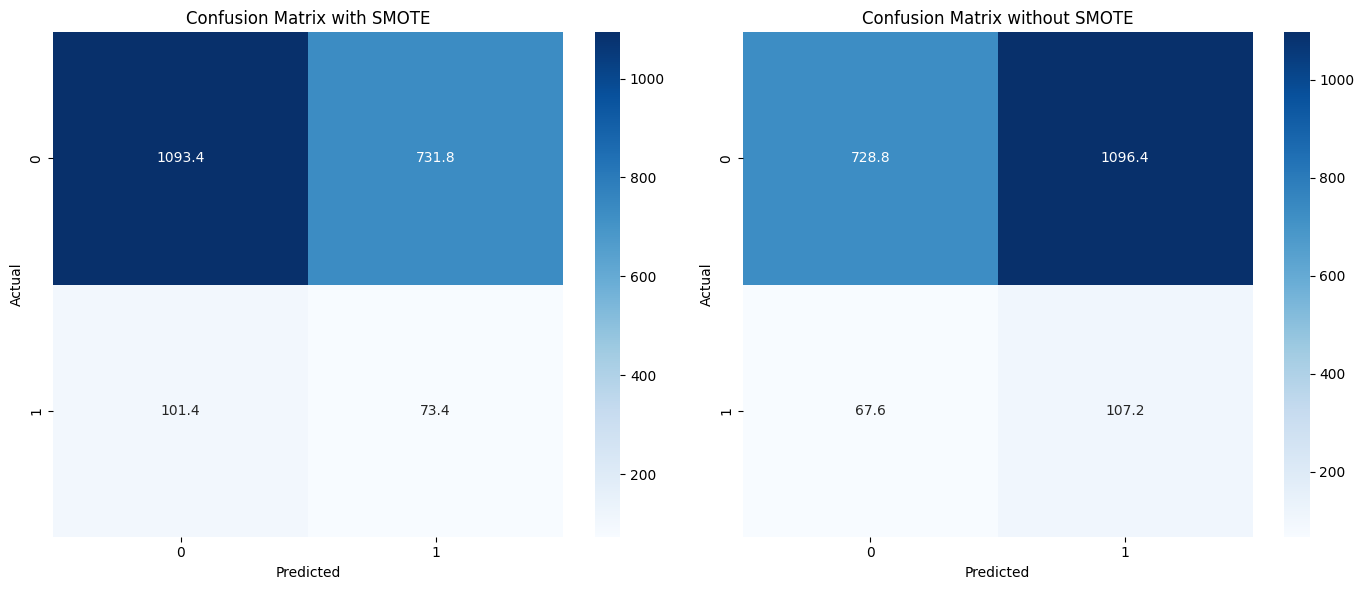

In [146]:
# Average confusion matrices across folds
avg_cm_smote = np.mean(conf_matrices_smote, axis=0)
avg_cm_no_smote = np.mean(conf_matrices_no_smote, axis=0)

# ---- Heatmap for Confusion Matrices ---- #
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(avg_cm_smote, annot=True, fmt='.1f', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix with SMOTE")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(avg_cm_no_smote, annot=True, fmt='.1f', cmap='Blues', ax=axes[1])
axes[1].set_title("Confusion Matrix without SMOTE")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

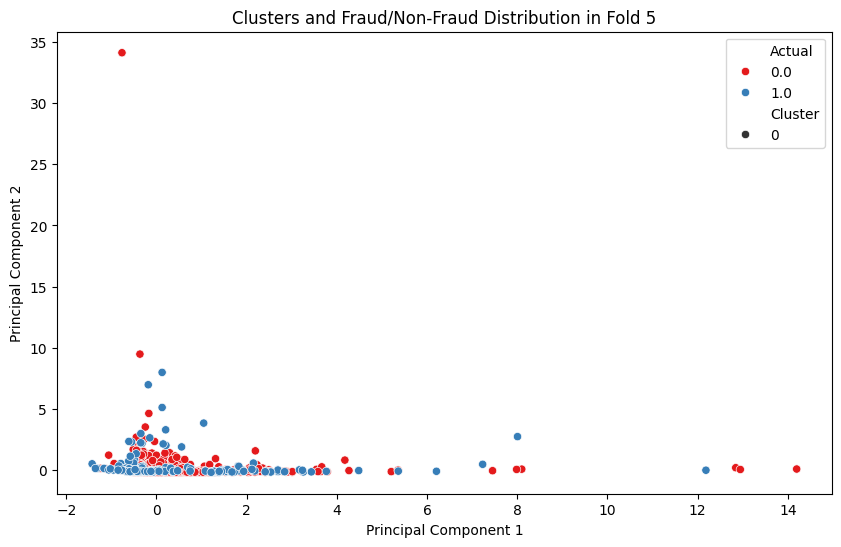

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize validation data in 2D PCA space
X_val_2d = PCA(n_components=2).fit_transform(X_val)
results_df['PC1'] = X_val_2d[:, 0]
results_df['PC2'] = X_val_2d[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='PC1', y='PC2', hue='Actual', style='Cluster', palette='Set1')
plt.title(f"Clusters and Fraud/Non-Fraud Distribution in Fold {fold + 1}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()
